<a href="https://colab.research.google.com/github/jamessandy/OBF-News-letter/blob/master/Regression_Model_with_pima_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import read_csv
from matplotlib  import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data = read_csv(url)
peek = data.head()
print(peek)

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [11]:
shape = data.shape
print(shape)

(767, 9)


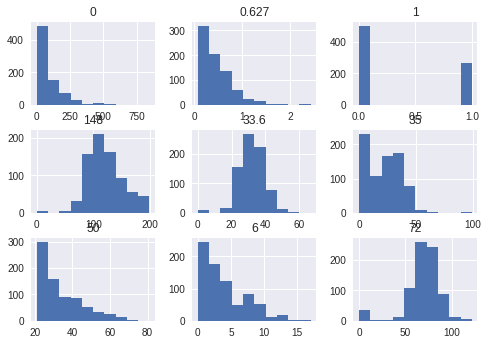

In [14]:
data.hist()
pyplot.show()

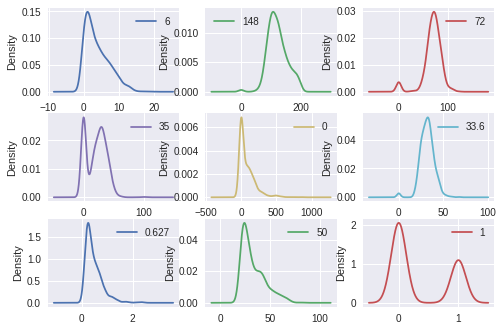

In [15]:
data.plot(kind='density', subplots= True, layout=(3,3), sharex= False)
pyplot.show()

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
array = data.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 110.727 1406.59    17.505   51.008 2219.398  127.671    5.356  178.011]
[[ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]
 [116.    0.   25.6  30. ]]


In [21]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(result)

0.7677165354330708


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
